# Comparison of RIO vs. BOCA

## Imports

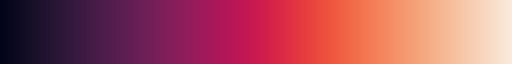

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
import seaborn as sns
from collections import Counter
plt.style.use('seaborn-v0_8')
sns.color_palette("rocket", as_cmap=True)

In [44]:
dir_path = "files/PO_FirstTest"

# Test Results
cacheprof_RIO = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-NEW_PHASEORDER_RIO-0.csv", index_col=[0])
sorting_RIO = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-NEW_PHASEORDER_RIO-0.csv", index_col=[0])
maillist_RIO = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-NEW_PHASEORDER_RIO-0.csv", index_col=[0])
hidden_RIO = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-NEW_PHASEORDER_RIO-0.csv", index_col=[0])

# BOCA Test Results
cacheprof_BOCA = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-BOCA-RESULTS-0.csv", index_col=[0])
sorting_BOCA = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-BOCA-RESULTS-0.csv", index_col=[0])
maillist_BOCA = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-BOCA-RESULTS-0.csv", index_col=[0])
hidden_BOCA = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-BOCA-RESULTS-0.csv", index_col=[0])

# Control Group (O2 In Default Order)
cacheprof_default = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-Iterative-BIGRIO-0.csv", index_col=[0])
hidden_default = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
maillist_default =  pd.read_csv(f"{dir_path}/maillist-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])
sorting_default = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-Iterative-PHASEORDERRIO-0.csv", index_col=[0])

# Fast Rule
cacheprof_fast = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
hidden_fast = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
maillist_fast = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])
sorting_fast = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-BOCA-FAST-RULE-MANIP-0.csv", index_col=[0])

# Slow Rule
cacheprof_slow = pd.read_csv(f"{dir_path}/cacheprof-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
hidden_slow = pd.read_csv(f"{dir_path}/hidden-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
maillist_slow = pd.read_csv(f"{dir_path}/maillist-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])
sorting_slow = pd.read_csv(f"{dir_path}/sorting-PHASEORDER-BOCA-PO-BOCA-SLOW-RULE-MANIP-0.csv", index_col=[0])



slow_tables = {"cacheprof": cacheprof_slow, "maillist": maillist_slow, "hidden": hidden_slow, "sorting": sorting_slow}
fast_tables = tables = {"cacheprof": cacheprof_fast, "maillist": maillist_fast, "hidden": hidden_fast, "sorting": sorting_fast}
program_tables = {"cacheprof": {"BOCA": cacheprof_BOCA, "RIO": cacheprof_RIO, "O2": cacheprof_default}, "sorting": {"BOCA": sorting_BOCA, "RIO": sorting_RIO, "O2": sorting_default}, "hidden": {"BOCA": hidden_BOCA, "RIO":  hidden_RIO, "O2": hidden_default}, "maillist": {"BOCA": maillist_BOCA, "RIO": maillist_RIO, "O2": maillist_default}}

## Adding New Columns

### Normalization (Z-Score)

In [45]:
normalized_tables = {}
tick_labels = []

for d_name, d in program_tables.items():
    for type, t in d.items():
        t["Norm-Z"] = (t["Runtime"] - t["Runtime"].mean())/t["Runtime"].std()
        t.drop(columns=["Mode"])
            #normalized_tables[t_name] = temp_table

### Noramlization (Default Phase Order)

In [46]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        normalize_around = O2_numbers
        offset = normalize_around - t["Runtime"].mean()
        t["Norm-Default"] = (t["Runtime"] - normalize_around)/t["Runtime"].std()

## Data Visualization

### Boxplot of Z-Score

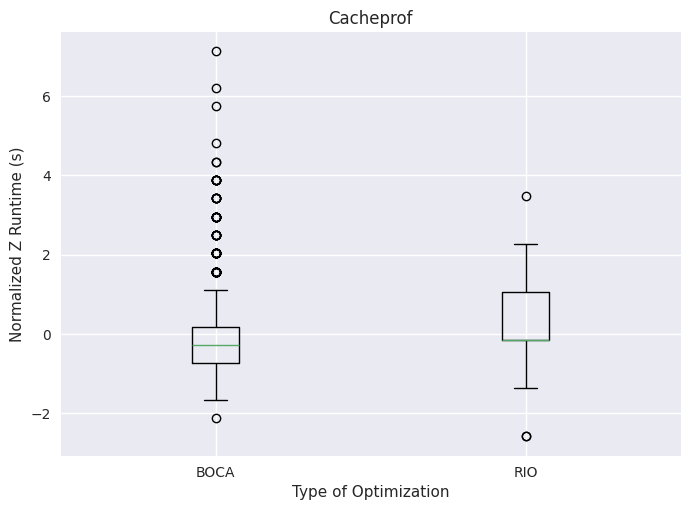

In [47]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["cacheprof"].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Cacheprof")

plt.show()

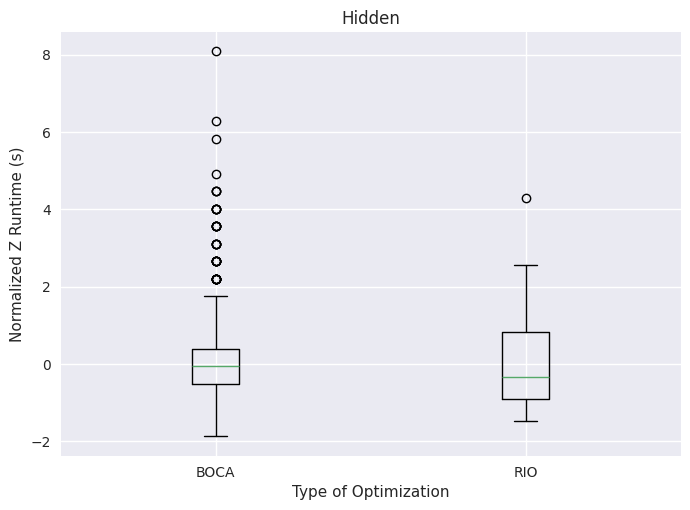

In [48]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["hidden"].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Hidden")

plt.show()

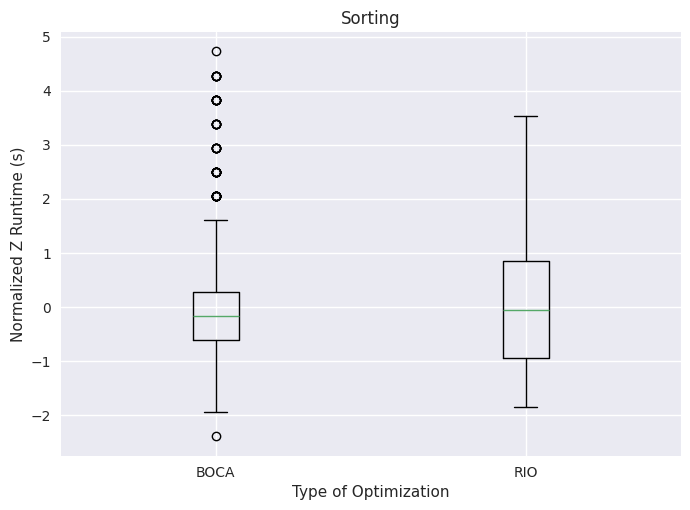

In [49]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["sorting"].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Sorting")

plt.show()

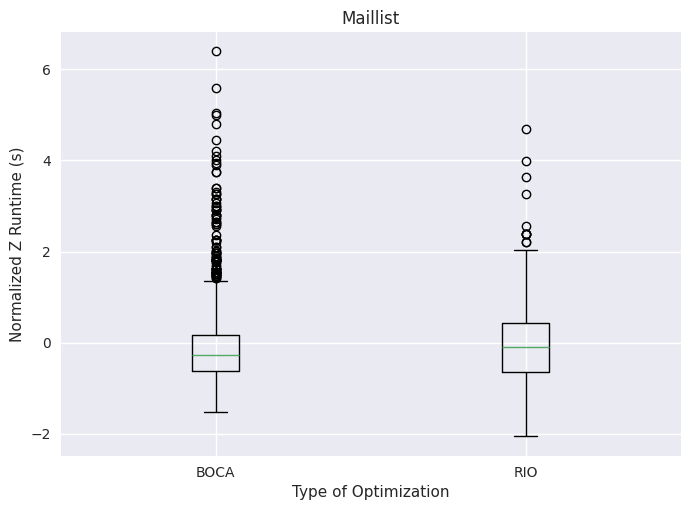

In [50]:
fig, ax = plt.subplots()

lst1 = []
labels = []
for type_name, t in program_tables["maillist"].items():
    if type_name != "O2":
        lst1.append(t["Norm-Z"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized Z Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"Maillist")

plt.show()

### O2 Boxplot

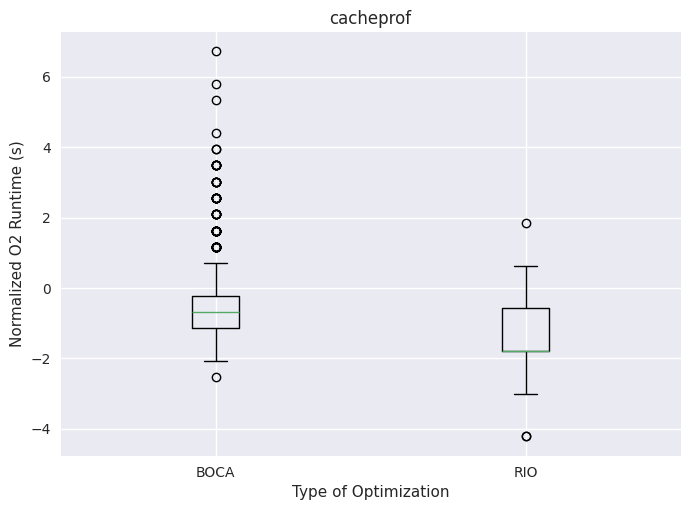

In [51]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "cacheprof"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

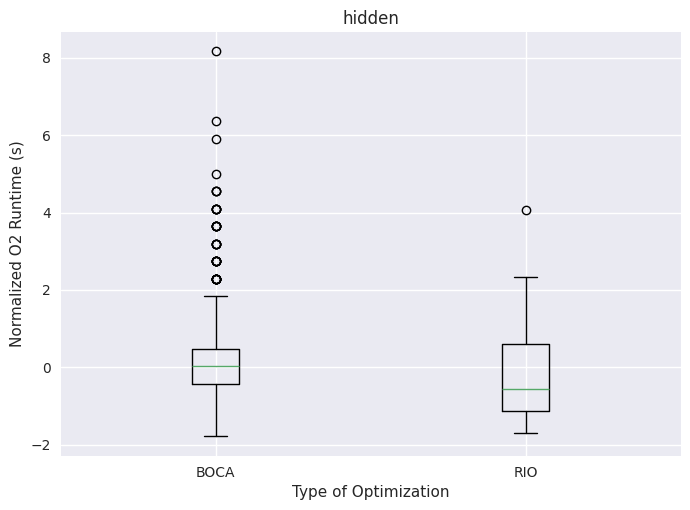

In [52]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "hidden"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

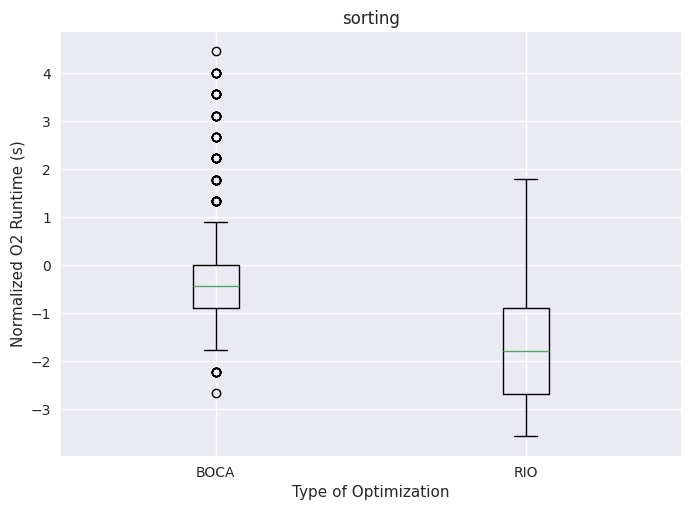

In [53]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "sorting"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

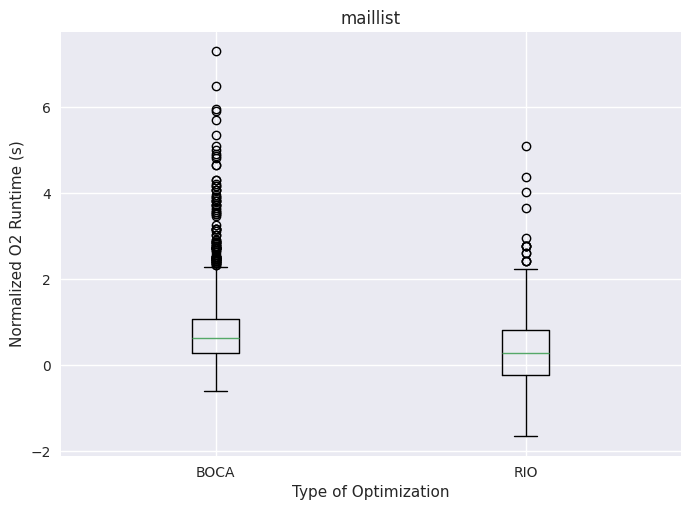

In [54]:
fig, ax = plt.subplots()

lst1 = []
labels = []
program_name = "maillist"
for type_name, t in program_tables[program_name].items():
    if type_name != "O2":
        lst1.append(t["Norm-Default"])
        labels.append(type_name)
    
ax.boxplot(lst1)
ax.set_xticklabels(labels)
ax.set_ylabel(f"Normalized O2 Runtime (s)")
ax.set_xlabel(f"Type of Optimization")
ax.set_title(f"{program_name}")

plt.show()

In [55]:
for d_name, d in program_tables.items():
    O2_numbers = program_tables[d_name]["O2"]["Runtime"].mean()
    for type, t in d.items():
        O2_mean = O2_numbers
        t["Comparison to Mean"] = (t["Runtime"]/O2_mean)


In [56]:
for d_name, d in program_tables.items():
    print(t.sort_values("Runtime").head())



                                       ID  \
153  c45d3c06-83e5-4ad5-aa52-4f2e1606a103   
183  80e84927-cdb4-462d-a032-ea2a5924559a   
215  79380d00-face-458f-bfb6-3553c104e531   
244  013a820c-58d8-408b-931f-743630e05aba   
184  9afa747b-5708-43dd-89f2-e6c19a07f9d8   

                                                 Phase  Mode  Runtime  \
153  0|1|2|3|4|5|6|7|8|9|10|11|12|13|15|16|22|19|20...  fast    0.603   
183  0|1|2|3|4|5|6|7|8|9|10|11|12|13|17|19|15|23|16...  fast    0.604   
215  0|1|2|3|4|5|6|7|8|9|10|11|12|13|19|23|16|15|20...  fast    0.604   
244  0|1|2|3|4|5|6|7|8|9|10|11|12|13|16|14|22|18|21...  fast    0.605   
184  0|1|2|3|4|5|6|7|8|9|10|11|12|13|15|20|18|16|23...  fast    0.605   

     Elapsed_Time    Norm-Z  Norm-Default  Comparison to Mean  
153         0.603 -1.739683     -1.739683            0.976745  
183         0.604 -1.618507     -1.618507            0.978365  
215         0.604 -1.618507     -1.618507            0.978365  
244         0.605 -1.497331     -1

## Scatter plots of slow and fast rule

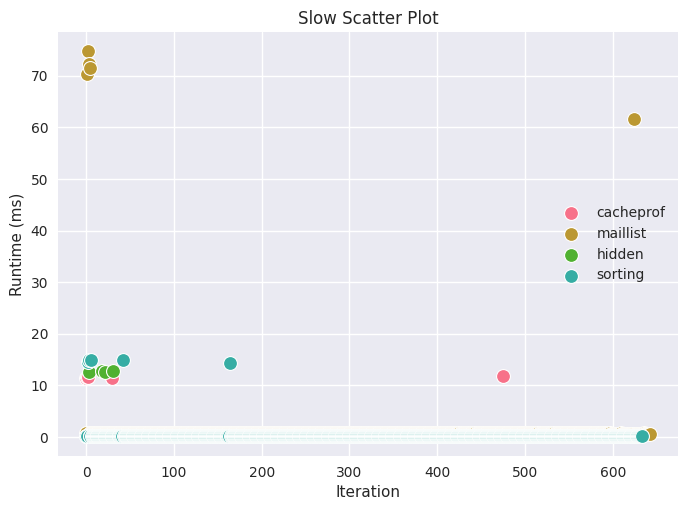

In [57]:

colors = ["red", "blue", "green", "yellow"]

# Scatter plot

count = 0
for program_name, df in slow_tables.items():
    sns.scatterplot(x=df.index, y=df["Runtime"], marker='o', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), s=100, label=program_name)
    count += 1

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Runtime (ms)')
plt.title('Slow Scatter Plot')

# Show the legend
plt.legend()

# Show the plot
plt.savefig('Slow_Scatter.png')
plt.show()


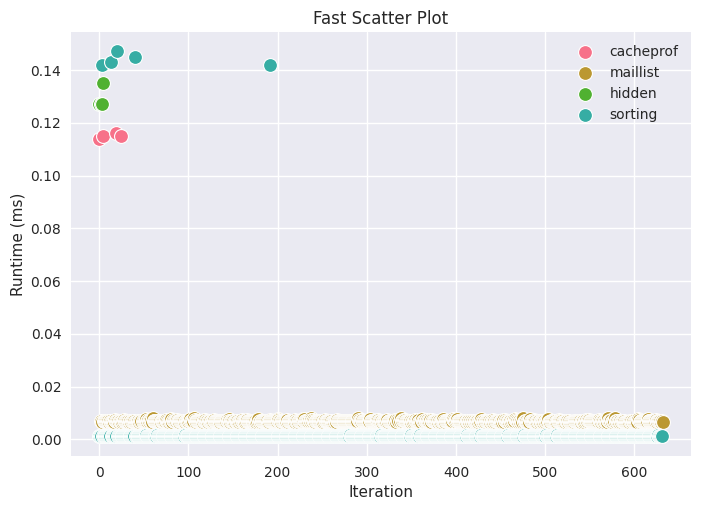

In [58]:

colors = ["red", "blue", "green", "yellow"]

# Scatter plot

count = 0
for program_name, df in fast_tables.items():
    df = df[df["Runtime"] <= .16]

    # Drop rows with NaN values (values greater than the mean)
    df = df.dropna()

    sns.scatterplot(x=df.index, y=df["Runtime"], marker='o', color=sns.color_palette("husl")[count % 4], sizes=(0, 10), s=100, label=program_name)
    count += 1

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Runtime (ms)')
plt.title('Fast Scatter Plot')

# Show the legend
plt.legend()

# Show the plot
plt.savefig('Fast_Scatter.png')
plt.show()


In [59]:
good_rules = ["liberate_case","spec_constr","rule_check2","late_specialise","triple_combo","late_dmd_anal","strict_anal","rule_check3","add_caller","add_late"]
bad_rules = ["static_args","presimplify","specialise","full_laziness_1","simpl3","float_in_1","call_arity","strictness","exitification","full_laziness_2","cse","final","rule_check1"]

def order_string_to_order_array(order_string):
    return list(filter(lambda x: x != '', order_string.split("|")))

def generate_BOCA_rules(order_array):
    # Creates rules for orderings. For example ("A", "B") => "A must go before B"
    combined_list = bad_rules + good_rules
    if (len(combined_list) != len(order_array)):
        raise ValueError(f"What the hell?: Combined List: {len(combined_list)}, Order List: {len(order_array)} \n {order_array}")
    rules_list = []
    blank_list = [None] * (len(combined_list))
    for index, optimization in enumerate(combined_list):
        pos_num = int(order_array[index])
        blank_list[pos_num] = optimization
    for index, opt_A in enumerate(blank_list):
        for opt_B in blank_list[index:]:
            if opt_A != opt_B:
                rules_list.append((opt_A, opt_B))
    # print(rules_list)
    # print(f"Order Array Length: {len(self.order_array)}")
    # print(f"Rules Length: {len(rules_list)}")
    return rules_list

def generate_all_possible_valid_rules():
    # Uses the movable optimization list to create possible pairs. Does not touch the invalid list.
    all_rules = []
    for opt_A in good_rules:
        for opt_B in good_rules:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

def generate_all_possible_rules():
    all_rules = []
    combined_list = bad_rules + good_rules
    for opt_A in combined_list:
        for opt_B in combined_list:
            if opt_A != opt_B:
                all_rules.append((opt_A, opt_B))
    return all_rules

In [60]:
all_possible_rules = generate_all_possible_rules()
all_valid_rules = generate_all_possible_valid_rules()
all_default_rules = list(set(all_possible_rules) - set(all_valid_rules))

default_ordering_rules = generate_BOCA_rules(order_string_to_order_array("0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22"))

In [61]:
for program_name, df in fast_tables.items():
    df['Rules'] = df['Phase'].apply(order_string_to_order_array)
    df["Rules"] = df['Rules'].apply(generate_BOCA_rules)

for program_name, df in slow_tables.items():
    df['Rules'] = df['Phase'].apply(order_string_to_order_array)
    df["Rules"] = df['Rules'].apply(generate_BOCA_rules)

for program_name, tables in program_tables.items():
    for model, t in tables.items():
        if model == "BOCA":
            t['Rules'] = t['Phase'].apply(order_string_to_order_array)
            t["Rules"] = t['Rules'].apply(generate_BOCA_rules)

In [62]:
top_entries = []

for program_name, tables in program_tables.items():
    for model, t in tables.items():
        top_entries_t = []
        if model == "BOCA":
            t['Order Array'] = t['Phase'].apply(order_string_to_order_array)
            t['Rules'] = t['Order Array'].apply(generate_BOCA_rules)
            #print(program_tables[program_name]["O2"]["Runtime"].mean())
            df_sorted = t.sort_values("Runtime", ascending=True)
            top_entries.append(list(df_sorted[df_sorted["Runtime"] <= program_tables[program_name]["O2"]["Runtime"].mean()]["Rules"]))

tuple_count_per_program = []

for program in top_entries:
    flat_list = list(set([item for sublist in program for item in sublist]) - set(all_default_rules))
    tuple_count_per_program.append(Counter(flat_list))

big_counter = Counter()

for program_counter in tuple_count_per_program:
    big_counter += program_counter

top_counter_25 = big_counter.most_common(25)

print("Top 25 Elements:")
for element, count in top_counter_25:
    print(f"{element}: {count}")

Top 25 Elements:
('triple_combo', 'add_late'): 4
('rule_check3', 'add_late'): 4
('strict_anal', 'add_late'): 4
('rule_check2', 'rule_check3'): 4
('late_specialise', 'late_dmd_anal'): 4
('rule_check3', 'spec_constr'): 4
('strict_anal', 'spec_constr'): 4
('spec_constr', 'rule_check2'): 4
('triple_combo', 'rule_check2'): 4
('spec_constr', 'strict_anal'): 4
('triple_combo', 'strict_anal'): 4
('add_late', 'liberate_case'): 4
('rule_check2', 'triple_combo'): 4
('late_dmd_anal', 'rule_check3'): 4
('add_caller', 'rule_check3'): 4
('add_late', 'rule_check2'): 4
('rule_check2', 'late_specialise'): 4
('late_dmd_anal', 'triple_combo'): 4
('add_late', 'strict_anal'): 4
('add_caller', 'triple_combo'): 4
('strict_anal', 'add_caller'): 4
('spec_constr', 'add_caller'): 4
('liberate_case', 'rule_check2'): 4
('triple_combo', 'add_caller'): 4
('liberate_case', 'strict_anal'): 4


In [63]:
top_counter_25_set = []
for element, count in top_counter_25:
    top_counter_25_set.append(element)

new_rules_set = list(set(top_counter_25_set) - set(default_ordering_rules))

print("Candidates for Better Rules?:")
for rule in new_rules_set:
    print(f"{rule}")

Candidates for Better Rules?:
('rule_check3', 'spec_constr')
('strict_anal', 'spec_constr')
('triple_combo', 'rule_check2')
('add_caller', 'triple_combo')
('add_caller', 'rule_check3')
('add_late', 'liberate_case')
('add_late', 'rule_check2')
('late_dmd_anal', 'triple_combo')
('add_late', 'strict_anal')
